In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import copy

# Users

In [2]:
# checking users

users = pd.read_csv('users.csv', index_col=0)
users

,id,created_at,class,coordinates
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"
...,...,...,...,...
995,d91c5e9a-ed7e-4f4a-b62b-ddabe069198a,2021-11-15 15:16:47,Viewer,"('-23.44361', '-51.87389')"
996,b80a25b8-a567-449c-af7a-420c46254112,2021-03-26 22:23:00,Creator,"('54.48147', '53.47103')"
997,3d27e9ff-bc73-47f7-a51d-3047e6ec959f,2021-08-28 20:45:04,Super Gamer,"('18.87813', '72.93924')"
998,84e57e9b-4e2e-408b-a351-2aedf85a207c,2021-04-15 10:35:55,Viewer,"('31.92923', '34.86563')"


In [3]:
# checking for completeness and datatype

users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   object
 1   created_at   1000 non-null   object
 2   class        1000 non-null   object
 3   coordinates  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [4]:
# confirming that there are no duplicate IDs

users['id'].nunique()

1000

In [5]:
users = users.drop('id', axis=1)
users

,created_at,class,coordinates
0,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"
...,...,...,...
995,2021-11-15 15:16:47,Viewer,"('-23.44361', '-51.87389')"
996,2021-03-26 22:23:00,Creator,"('54.48147', '53.47103')"
997,2021-08-28 20:45:04,Super Gamer,"('18.87813', '72.93924')"
998,2021-04-15 10:35:55,Viewer,"('31.92923', '34.86563')"


## User Class

In [6]:
# Displaying the numbers of each class

users[['class']].value_counts()

# the counts show that the breakdown is not completely skewed

class        
Gamer            213
Super Gamer      209
Super Creator    206
Creator          186
Viewer           186
dtype: int64

<AxesSubplot:xlabel='class'>

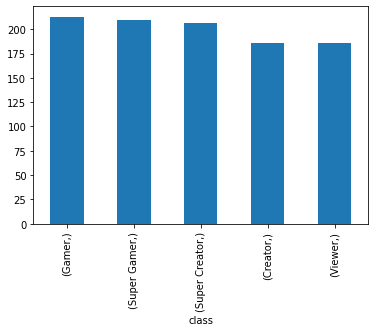

In [7]:
# Showing graphical information for the class breakdown

users[['class']].value_counts().plot(kind='bar')

In [8]:
# separating out year, month, and month_year

# converting created_at feature to datetime for ease of use
users['datetime'] = pd.DatetimeIndex(users['created_at'])

# get the year and month to see what the breakdown is by year
users['year'] = users['datetime'].dt.year
users['month'] = users['datetime'].dt.month
# users['m_y'] = users['datetime'].dt.strftime('%m-%Y')

# number of new users per month broken down by year
users[['year', 'month']].value_counts().sort_index()

year  month
2021  1         90
      2         79
      3         83
      4         85
      5         77
      6         83
      7        103
      8         88
      9         93
      10        82
      11        95
      12        42
dtype: int64

<AxesSubplot:title={'center':'New User by Month in 2021'}, xlabel='month', ylabel='Number of New Users'>

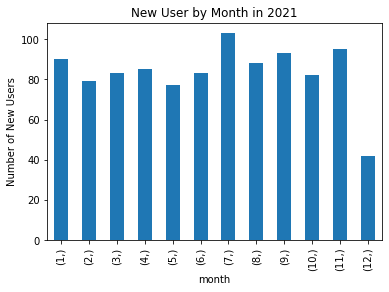

In [9]:
# A graph would be easier to interpret even though we can see that July is the high and December is the low above

plt.title('New User by Month in 2021')
plt.ylabel('Number of New Users')
users[['month']].value_counts().sort_index().plot(kind='bar')

# peak is July, low is December (CONFIRMED)
# What could possibly affect the userbase in DECEMBER?

In [10]:
# checking to see if December has complete data

users['day'] = users['datetime'].dt.day

users[users['month'] == 12]['day'].value_counts().sort_index()

# December's data is sparse after the 15th
# but even December 5th and 14th have no data
# given these 2 missing days, it is plausible that the December data is complete and people just did not sign up
# it is also plausible that something was wrong with the servers

1     5
2     3
3     1
4     1
6     3
7     3
8     5
9     2
10    2
11    6
12    1
13    6
15    4
Name: day, dtype: int64

In [11]:
# given that January's data is complete, it is odd that December's data is missing since both months have bigger holidays
# Should also look for holidays in India as userbase is large there

users[users['month'] == 1]['day'].value_counts().sort_index()

1     8
2     5
3     2
4     3
5     1
6     2
7     3
8     4
9     1
10    4
11    4
12    4
13    1
14    3
15    6
16    1
17    4
18    2
19    3
20    1
21    4
22    3
23    2
24    2
25    4
26    3
27    3
28    1
29    1
30    2
31    3
Name: day, dtype: int64

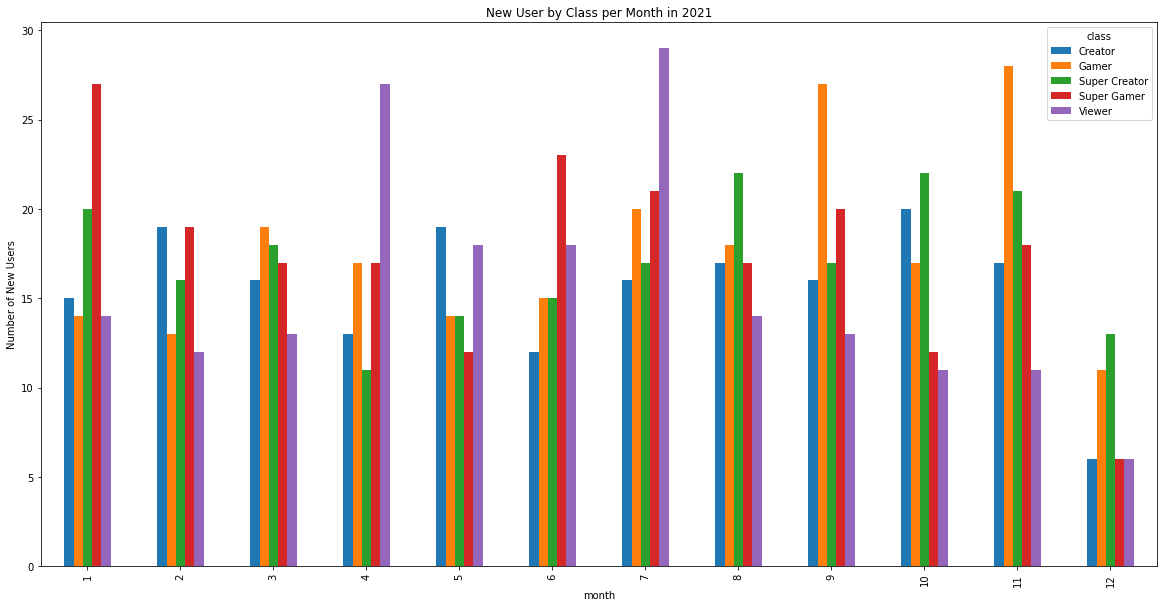

In [12]:
# looking to see if there is a trend that all users follow by using an unstacked bar chart to possibly find trends

users.groupby(['class', 'month'])['month'].count().unstack('class').plot(kind='bar', figsize=(20,10))
plt.title('New User by Class per Month in 2021')
plt.ylabel('Number of New Users')
plt.show()

# the unstacked bar chart is quite messy looking and an overall trend between user classes seems indistinguishable
# Super gamer peaked in Jan
# Viewer peaked in April and July
# Gamer peaked in September and November

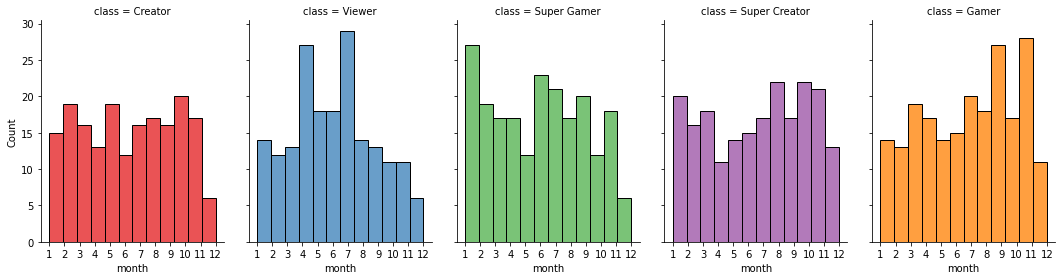

In [39]:
# Using a side by side comparison to get a cleaner look at the trends of each class

user_class = sns.FacetGrid(data=users, col='class', hue='class', palette='Set1', height=4, aspect=30/40)
user_class.map(sns.histplot, 'month', bins=12)
user_class.set(xticks=np.arange(1,13))

# The noticeable trends in the unstacked bar chart are visible even in side by side comparison

# Super Gamer -> trend seems to decrease
# Gamer -> trend seems to increase
# Super Gamer transitioning to Gamer?
# Why are there so many Super Gamers in Jan? Sign up bonus?
# Why does Gamer spike in September and November?


# Viewer -> spikes in April and July
# Why is new Viewership so high in April and July?

### Creator

Text(0, 0.5, 'Number of New Creators')

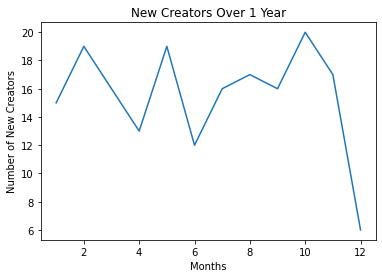

In [48]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new creators by month sorting by index
users_creator = users[users['class']=='Creator']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
users_creator_list = list(users_creator)

# plot the time-series graph
plt.plot(months_list, users_creator_list)
plt.title('New Creators Over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New Creators')

In [45]:
# testing significance of possible trends using mann-kendall test

import pymannkendall as mk

# run the mk test
df_creator = pd.DataFrame(mk.original_test(users_creator_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_creator.columns = ['Statistics']
df_creator['Label'] = mk_labels
df_creator = df_creator.set_index('Label')
df_creator

# According to mk:
# there is no trend, but we still see there is a drop in December (WHY?)

,Statistics
Label,
trend,no trend
h,False
p,1.0
z,0.0
Tau,0.015152
s,1.0
var_s,207.0
slope,0.0
intercept,16.0


### Viewer

Text(0, 0.5, 'Number of New Viewers')

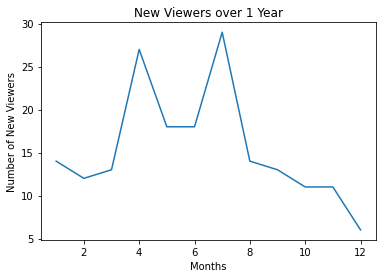

In [49]:
# A line graph to see the time series graph 

# get the count of new viewers by month sorting by index
users_viewer = users[users['class']=='Viewer']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
users_viewer_list = list(users_viewer)

# plot the time-series graph
plt.plot(months_list, users_viewer_list)
plt.title('New Viewers over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New Viewers')

In [50]:
# testing significance of possible trends using mann-kendall test

# run the mk test
df_viewer = pd.DataFrame(mk.original_test(users_viewer_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_viewer.columns = ['Statistics']
df_viewer['Label'] = mk_labels
df_viewer = df_viewer.set_index('Label')
df_viewer

# According to mk:
# there is no trend, but we still see spikes in the middle (WHY?)
# there is also a dip at the end

,Statistics
Label,
trend,no trend
h,False
p,0.111337
z,-1.592213
Tau,-0.363636
s,-24.0
var_s,208.666667
slope,-0.752525
intercept,17.638889


### Super Gamer

Text(0, 0.5, 'Number of New Super Gamers')

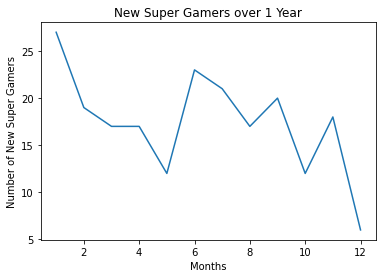

In [51]:
# A line graph to see the time series graph 

# get the count of new super_gamers by month sorting by index
users_super_gamer = users[users['class']=='Super Gamer']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
users_super_gamer_list = list(users_super_gamer)

# plot the time-series graph
plt.plot(months_list, users_super_gamer_list)
plt.title('New Super Gamers over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New Super Gamers')

In [52]:
# testing significance of possible trends using mann-kendall test

# run the mk test
df_super_gamer = pd.DataFrame(mk.original_test(users_super_gamer_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_super_gamer.columns = ['Statistics']
df_super_gamer['Label'] = mk_labels
df_super_gamer = df_super_gamer.set_index('Label')
df_super_gamer

# According to mk:
# there is no trend, but we still see it is decreasing

,Statistics
Label,
trend,no trend
h,False
p,0.110765
z,-1.594763
Tau,-0.363636
s,-24.0
var_s,208.0
slope,-0.8875
intercept,22.38125


### Super Creator

Text(0, 0.5, 'Number of New Super Creators')

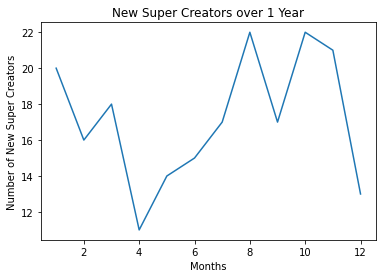

In [55]:
# A line graph to see the time series graph 

# get the count of new super_creators by month sorting by index
users_super_creator = users[users['class']=='Super Creator']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
users_super_creator_list = list(users_super_creator)

# plot the time-series graph
plt.plot(months_list, users_super_creator_list)
plt.title('New Super Creators over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New Super Creators')

In [56]:
# testing significance of possible trends using mann-kendall test

# run the mk test
df_super_creator = pd.DataFrame(mk.original_test(users_super_creator_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_super_creator.columns = ['Statistics']
df_super_creator['Label'] = mk_labels
df_super_creator = df_super_creator.set_index('Label')
df_super_creator

# According to mk:
# there is no trend

,Statistics
Label,
trend,no trend
h,False
p,0.629606
z,0.482281
Tau,0.121212
s,8.0
var_s,210.666667
slope,0.211111
intercept,15.838889


### Gamer

Text(0, 0.5, 'Number of New Gamers')

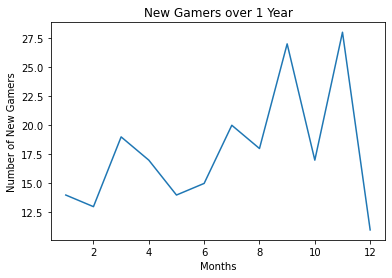

In [57]:
# A line graph to see the time series graph 

# get the count of new gamers by month sorting by index
users_gamer = users[users['class']=='Gamer']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
users_gamer_list = list(users_gamer)

# plot the time-series graph
plt.plot(months_list, users_gamer_list)
plt.title('New Gamers over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New Gamers')

In [58]:
# testing significance of possible trends using mann-kendall test

# run the mk test
df_gamer = pd.DataFrame(mk.original_test(users_gamer_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_gamer.columns = ['Statistics']
df_gamer['Label'] = mk_labels
df_gamer = df_gamer.set_index('Label')
df_gamer

# According to mk:
# there is no trend

,Statistics
Label,
trend,no trend
h,False
p,0.241497
z,1.171254
Tau,0.272727
s,18.0
var_s,210.666667
slope,0.5
intercept,14.25


In [ ]:
# Geolocation

# For further analysis, I would want to see the concentrations where each class of user is located
    # This would be in the form of a heat map of India and other locations where users are located
    
    # To further add to the discovery, I would want to see heat maps of the different user classes
    # to find out where each class is located and to find out why

# I would also try to delve deeper into why the concentrations are they way they are
    # is it just a more populous city?
    # is there an attraction that people are drawn to in that area?
    # is internet faster or more stable in particular areas?
    # is there access to mobile devices that support the app in those areas?
    
